# **Implement Markov Decision Process (MDP) Simulation and Value Iteration**

An MDP is a stochastic (randomly-determined) mathematical tool that models decision-making problems where outcomes are partially random and partially controllable.

An **MDP** is defined by a **five-element tuple**:
* **S:** The state space
* **A:**  The set of all possible actions
* **T:** The set of time steps where decisions need to be made
* **p():** The state transition probability function
* **r():** The reward function defined on state transitions

MDPs are used to make optimal decisions for dynamic systems while considering their current state and the environment in which they operate.

The solution to an MDP is called a policy, which is a recipe that tells you what action to execute in a given state to maximize your expected future reward.

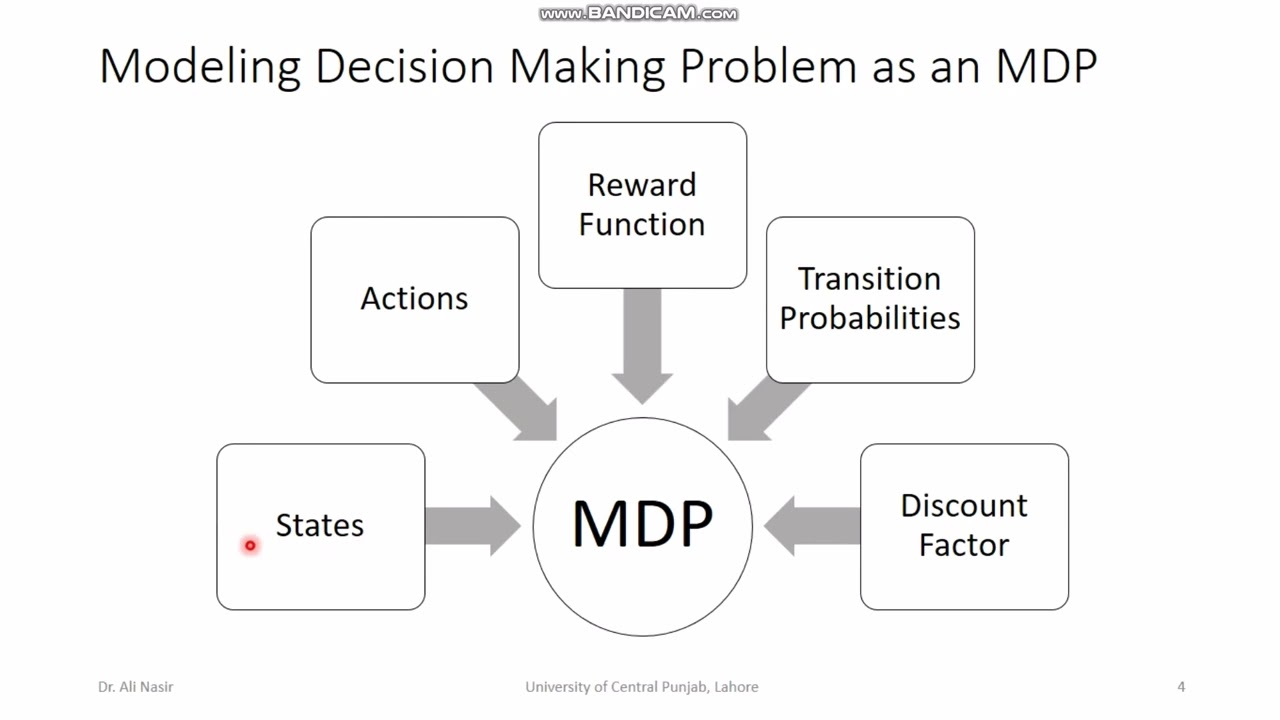

In [ ]:
import numpy as np

In [ ]:
# MDP components
states = ['s0', 's1', 's2', 's3']
actions = ['a0', 'a1']

In [ ]:
# Transition probabilities P[state][action] = [(probability, next_state, reward)]
p = {
    's0': {'a0': [(0.8, 's1', 5), (0.2, 's2', 1)],
           'a1': [(1.0, 's0', 0)]},
    's1': {'a0': [(0.7, 's2', 2), (0.3, 's3', 8)],
           'a1': [(0.9, 's0', 3), (0.1, 's1', -1)]},
    's2': {'a0': [(1.0, 's3', 4)],
           'a1': [(0.5, 's1', 2), (0.5, 's0', 0)]},
    's3': {'a0': [(1.0, 's3', 0)],
           'a1': [(1.0, 's0', 0)]}
}

In [ ]:
# Discount factor- gamma
g = 0.9

In [ ]:
#value function for each state to 0
vf = {state: 0 for state in states}

In [ ]:
m = 10000                                       #max no. of iterations
t = 1e-4                                        #threshold

def mdp_v_iter(vf, p, gamma, m, t):
    for i in range(m):
        delta = 0
        new_vf = vf.copy()

        for state in states:
            action_values = []
            for action in actions:
                value_sum = sum(prob * (reward + gamma * vf[next_state])
                                for prob, next_state, reward in p[state][action])
                action_values.append(value_sum)

            new_vf[state] = max(action_values)
            delta = max(delta, abs(new_vf[state] - vf[state]))

        vf = new_vf
        if delta < t:
            print(f'Value iteration converged after {i + 1} iterations.')
            break

    return vf

# Calling the funcion
optimal = mdp_v_iter(vf, p, g, m, t)
print('Optimal Value Function:', optimal)

Value iteration converged after 100 iterations.
Optimal Value Function: {'s0': 32.706433619486646, 's1': 31.96937135967065, 's2': 30.492052972264794, 's3': 29.435706963054088}


**Inference-** The value iteration converged after 100 iterations, yielding the optimal value function. The values indicate that the highest expected long-term reward is in state s0 (32.71), followed by s1 (31.97), s2 (30.49), and finally s3 (29.44), showing the relative benefit of being in each state.

In [ ]:
def optimal_pol(vf, p, g):
    policy = {}
    for state in states:
        best_action = None
        best_action_value = float('-inf')
        for action in actions:
            action_value = sum(prob * (reward + g * vf[next_state])
                               for prob, next_state, reward in p[state][action])
            if action_value > best_action_value:
                best_action_value = action_value
                best_action = action
        policy[state] = best_action
    return policy

# Derive the optimal policy
optimal_policy = optimal_pol(optimal, p, g)
print('Optimal Policy:', optimal_policy)


Optimal Policy: {'s0': 'a0', 's1': 'a1', 's2': 'a0', 's3': 'a1'}


**Inference-** The optimal policy suggests that in state s0, the best action is a0; in state s1, the best action is a1; in state s2, the best action is a0; and in state s3, the best action is a1. This indicates the recommended action for each state to maximize long-term rewards.